In [153]:
import spacy
import pandas as pd
import spacytextblob
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
from spacytextblob.spacytextblob import SpacyTextBlob

In [155]:
nlp = spacy.load('en_core_web_sm')

In [156]:
nlp.add_pipe('spacytextblob')

In [157]:
df = pd.read_csv('amazon_product_reviews.csv')
# The .csv file can be downloaded at 'https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/download?datasetVersionNumber=5'

In [158]:
cleaned_df = df.dropna(subset=['reviews.text'])

In [159]:
cleaned_df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [161]:
# Function to remove stopwords using spaCy
def remove_stopwords(text):
    doc = nlp(text)
    tokens_without_stopwords = [token.text for token in doc if not (token.is_stop or token.is_punct)]
    return ' '.join(tokens_without_stopwords)

In [162]:
# Apply the function to the 'reviews.text' column
cleaned_df['reviews.text'] = cleaned_df.apply(remove_stopwords('reviews.text'))

In [163]:
def lowercase_reviews(text):
    return text.lower()

# Apply lowercase_reviews function to the 'reviews.text' column
cleaned_df['reviews.text'] = cleaned_df['reviews.text'].apply(lowercase_reviews)

In [164]:
def analyze_sentiment(text):
    doc = nlp(text)
    return doc._.blob.sentiment  # Access the sentiment score

In [165]:
def analyze_polarity(text):
    doc = nlp(text)
    return doc._.blob.polarity  # Access the polarity score

In [166]:
# Apply sentiment analysis function to the 'reviews.text' column
cleaned_df['sentiment'] = cleaned_df['reviews.text'].apply(analyze_sentiment)

In [167]:
# Apply polarity analysis function to the 'reviews.text' column
cleaned_df['polarity'] = cleaned_df['reviews.text'].apply(analyze_polarity)

In [171]:
cleaned_df.head() # Check to see if the new columns have been added

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,sentiment,polarity
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,i thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...,"(-0.10897435897435898, 0.34871794871794864)",-0.108974
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,this kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...,"(0.2777777777777778, 0.8444444444444444)",0.277778
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...,"(0.165625, 0.525)",0.165625
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,i am 100 happy with my purchase. i caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...,"(0.24049707602339182, 0.5445279866332497)",0.240497
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,solid entry level kindle. great for kids. gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...,"(0.46875, 0.5687500000000001)",0.468750


In [168]:
cleaned_df['sentiment'].head

<bound method NDFrame.head of 0       (-0.10897435897435898, 0.34871794871794864)
1          (0.2777777777777778, 0.8444444444444444)
2                                 (0.165625, 0.525)
3         (0.24049707602339182, 0.5445279866332497)
4                     (0.46875, 0.5687500000000001)
                           ...                     
4995                                  (0.75, 0.675)
4996       (0.5770833333333334, 0.7395833333333334)
4997                                     (0.5, 0.5)
4998    (0.016666666666666666, 0.22222222222222224)
4999                                     (0.5, 0.5)
Name: sentiment, Length: 5000, dtype: object>

In [169]:
cleaned_df['polarity'].head

<bound method NDFrame.head of 0      -0.108974
1       0.277778
2       0.165625
3       0.240497
4       0.468750
          ...   
4995    0.750000
4996    0.577083
4997    0.500000
4998    0.016667
4999    0.500000
Name: polarity, Length: 5000, dtype: float64>

The graph below is unable to be displayed, seemingly because the column "sentiments" has two numerical values that can not be placed into the graph.  
I would be interested to find out a way to separate the columns and present the values

plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_df, x='sentiment', bins=20, kde=True, color='skyblue')
plt.title('Sentiments Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Show the plot
plt.show()

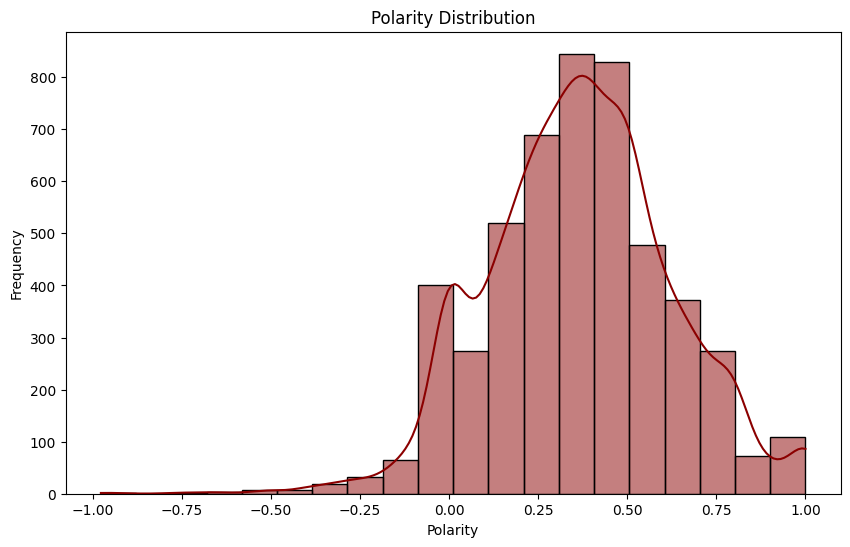

In [172]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_df, x='polarity', bins=20, kde=True, color='darkred')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [182]:
mean_polarity = cleaned_df['polarity'].mean()
print(mean_polarity)

0.36656579180169746


In [178]:
my_review_of_choice = cleaned_df['reviews.text'][0]
print(my_review_of_choice)

i thought it would be as big as small paper but turn out to be just like my palm. i think it is too small to read on it... not very comfortable as regular kindle. would definitely recommend a paperwhite instead.


In [180]:
print(analyze_sentiment(my_review_of_choice))

Sentiment(polarity=-0.10897435897435898, subjectivity=0.34871794871794864)
-0.10897435897435898
